# Swire Pacific's imputed valuation of unlisted business

The script below attempts to broadly track how the conglomerate's valuation of its unlisted businesses have changed over time. There is no investment conclusion as it is a learning exercise designed to use Python to try and understand the company better and for general interest. 

Swire Pacific is an interesting use case to do the analysis as it has a dual share structure of A shares and B shares. These two shares trade with different symbols on the Hong Kong stock exchange for the A shares (0019.HK) and for the B shares (0087.HK). Different voting rights are ascribed to each class of shares with A shares carrying 5 votes and each B share carrying 1 vote. 

So the combined market capitalization for the group is the sum of the market capitalization for the A shares and the B shares. The code first sets out to derive the market capitalization for the group over time. 

To derive the imputed valuation for the unlisted business of the group we have deducted from the group market capitalization the attributable share in the market capitalization of Swire Properties (1972.HK) in which Swire Pacific's interest is 82% and the attributable interest of Cathay Pacific (0293.HK) in which Swire Pacific holds 45%. The second part of the code sets out to show that. 

Once the listed portion of market capitalization has been stripped from the group market capitalization the share of what is left is computed and plotted in a chart. Let us go.

## 1. Market cap for Swire Pacific

### Swire Pacific - basic financial data

In [2]:
# create a dataframe of key financials for Swire Pacific (with assumptions made for fiscal year 2024)
# extracted from published annual reports
# forecast made for FY2024 - no responsibility for these numbers

import pandas as pd

# Specific end-of-year dates
dates = ["2013-12-31", "2014-12-31", "2015-12-31", "2016-12-31", 
         "2017-12-31", "2018-12-31", "2019-12-31", "2020-12-31", "2021-12-31", 
         "2022-12-31", "2023-12-31", "2024-12-31"]

# Corrected EPS, DPS and BVPS values for each date
areportedeps = [8.83, 7.36, 8.93, 6.41, 17.34, 15.74, 6, -7.61, 2.24, 2.81, 19.96, 7.32]
breportedeps = [1.77, 1.47, 1.79, 1.28, 3.47, 3.15, 1.2, -1.52, 0.45, 0.56, 3.99, 1.56]
adps = [3.5, 3.9, 3.9, 2.1, 2.1, 3, 3, 1.7, 2.6, 3, 11.32, 3 ]
bdps = [0.7, 0.78, 0.78, 0.42, 0.42, 0.6, 0.6, 0.34, 0.52, 0.6, 2.26, 0.6]
abvps = [146.41, 145.4, 145.22, 149.5, 168.58, 180.09, 182.04, 174.66, 177.49, 177.75, 186.03, 186 ]
bbvps = [29.28, 29.08, 29.04, 29.9, 33.72, 36.02, 36.41, 34.93, 35.5, 35.55, 37.21, 37.2]
shareeq = [220297, 218775, 218449, 224879, 253163, 270424, 273352, 262266, 266515, 258456, 268129, 268129 ]
reportednet = [13297, 11069, 13429, 9644, 26070, 23629, 9007, -11420, 3357, 4195, 29838, 10447 ]
asharecount = [905.5, 905.5, 905.4, 905.2, 905.2, 905.2, 905.2, 905.2, 905.2, 865.8, 856.8, 856]
bsharecount = [2995.2, 2995.2, 2995.2, 2995.2, 2990.8, 2981.8 ,2981.8, 2981.8, 2981.8, 2941.1, 2922.3, 2922]


# Creating the DataFrame
df = pd.DataFrame({
    "date": dates,
    "a_eps": areportedeps,
    "b_eps": breportedeps,
    "a_dps": adps,
    "b_dps": bdps,
    "a_bvps": abvps,
    "b_bvps": bbvps,
    "shareholders_equity": shareeq,
    "reported_net": reportednet,
    "a_count": asharecount,
    "b_count": bsharecount
    })

# Convert the 'date' column to datetime
df["date"] = pd.to_datetime(df["date"])

# Sort the DataFrame by the 'date' column
df = df.sort_values(by="date")

# Calculate year-on-year percentage change for EPS and DPS and round to one decimal place
df['yoy_a_eps_chg'] = df['a_eps'].pct_change().mul(100).round(1)
df['yoy_b_eps_chg'] = df['b_eps'].pct_change().mul(100).round(1)
df['yoy_a_dps_chg'] = df['a_dps'].pct_change().mul(100).round(1)
df['yoy_b_dps_chg'] = df['b_dps'].pct_change().mul(100).round(1)
df['yoy_a_bvps_chg'] = df['a_bvps'].pct_change().mul(100).round(1)
df['yoy_b_bvps_chg'] = df['b_bvps'].pct_change().mul(100).round(1)
df['yoy_shquity_chg'] = df['shareholders_equity'].pct_change().mul(100).round(1)
df['yoy_reported_net_chg'] = df['reported_net'].pct_change().mul(100).round(1)

# Format EPS and DPS as strings with two decimal places - uncheck if required.
#df['eps'] = df['eps'].map('{:.2f}'.format)
#df['dps'] = df['dps'].map('{:.2f}'.format)

# Print the DataFrame
print(df.tail())

# Save the DataFrame to a CSV file - uncheck to save
#df.to_csv("swire_fin_data.csv", index=False)

# save as pickle file - uncheck to save
#df.to_pickle("swire_fin_data.pkl")


         date  a_eps  b_eps  a_dps  b_dps  a_bvps  b_bvps  \
7  2020-12-31  -7.61  -1.52   1.70   0.34  174.66   34.93   
8  2021-12-31   2.24   0.45   2.60   0.52  177.49   35.50   
9  2022-12-31   2.81   0.56   3.00   0.60  177.75   35.55   
10 2023-12-31  19.96   3.99  11.32   2.26  186.03   37.21   
11 2024-12-31   7.32   1.56   3.00   0.60  186.00   37.20   

    shareholders_equity  reported_net  a_count  b_count  yoy_a_eps_chg  \
7                262266        -11420    905.2   2981.8         -226.8   
8                266515          3357    905.2   2981.8         -129.4   
9                258456          4195    865.8   2941.1           25.4   
10               268129         29838    856.8   2922.3          610.3   
11               268129         10447    856.0   2922.0          -63.3   

    yoy_b_eps_chg  yoy_a_dps_chg  yoy_b_dps_chg  yoy_a_bvps_chg  \
7          -226.7          -43.3          -43.3            -4.1   
8          -129.6           52.9           52.9       

### Derive market capitalization for Swire Pacific's A class of shares

In [3]:
# compute weekly market cap for swire A shares

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt  # Import matplotlib for plotting

yf.pdr_override()  # Override the default data source

def download_and_convert_to_weekly(stock_symbol, start_date, end_date):
    try:
        # Download daily stock data
        daily_data = yf.download(stock_symbol, start=start_date, end=end_date)

        # Convert daily data to weekly data and select 'Adj Close' only
        weekly_data = daily_data['Adj Close'].resample('W').mean()

        return weekly_data

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Usage
stock_symbol = '0019.HK'  # Swire Pacific A shares 
start_date = '2013-01-01'
end_date = '2026-12-31'

weekly_data = download_and_convert_to_weekly(stock_symbol, start_date, end_date)
if weekly_data is not None:
    # Reset the index so that the date becomes a column
    weekly_data_reset = weekly_data.reset_index()

    # Rename columns
    weekly_data_reset.columns = ['date', 'adj_close']

# Load data from basic financial info
swire_fin_data = df

# Extract the year from the date columns
swire_fin_data['year'] = swire_fin_data['date'].dt.year
weekly_data_reset['year'] = weekly_data_reset['date'].dt.year

# Merge the two dataframes on the year column
weekly_data_reset_merge_A = pd.merge(weekly_data_reset, swire_fin_data[['year', 'a_count']], on='year', how='left')

# compute market cap for a_count as a fresh column labelled mkt_cap_A as product of weekly adj_close and a_count
weekly_data_reset_merge_A['mkt_cap_A'] = weekly_data_reset_merge_A['adj_close'] * weekly_data_reset_merge_A['a_count']

# Print the weekly data
print(weekly_data_reset_merge_A)


[*********************100%%**********************]  1 of 1 completed

          date  adj_close  year  a_count     mkt_cap_A
0   2013-01-06  54.769825  2013    905.5  49594.076521
1   2013-01-13  54.827959  2013    905.5  49646.716584
2   2013-01-20  55.294843  2013    905.5  50069.480601
3   2013-01-27  55.351093  2013    905.5  50120.414285
4   2013-02-03  55.896732  2013    905.5  50614.491125
..         ...        ...   ...      ...           ...
580 2024-02-18  61.699999  2024    856.0  52815.199565
581 2024-02-25  63.560001  2024    856.0  54407.361176
582 2024-03-03  63.730000  2024    856.0  54552.880261
583 2024-03-10  62.600001  2024    856.0  53585.600653
584 2024-03-17  65.739999  2024    856.0  56273.439478

[585 rows x 5 columns]


### Derive market capitalization for Swire Pacific's B class of shares

In [4]:
# compute weekly market cap for swire B shares

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt  # Import matplotlib for plotting

yf.pdr_override()  # Override the default data source

def download_and_convert_to_weekly(stock_symbol, start_date, end_date):
    try:
        # Download daily stock data
        daily_data = yf.download(stock_symbol, start=start_date, end=end_date)

        # Convert daily data to weekly data and select 'Adj Close' only
        weekly_data = daily_data['Adj Close'].resample('W').mean()

        return weekly_data

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Usage
stock_symbol = '0087.HK'  # Swire Pacific B shares 
start_date = '2013-01-01'
end_date = '2026-12-31'

weekly_data = download_and_convert_to_weekly(stock_symbol, start_date, end_date)
if weekly_data is not None:
    # Reset the index so that the date becomes a column
    weekly_data_reset = weekly_data.reset_index()

    # Rename columns
    weekly_data_reset.columns = ['date', 'adj_close']

# Load data from basic financial info
swire_fin_data = df

# Extract the year from the date columns
swire_fin_data['year'] = swire_fin_data['date'].dt.year
weekly_data_reset['year'] = weekly_data_reset['date'].dt.year

# Merge the two dataframes on the year column
weekly_data_reset_merge_B = pd.merge(weekly_data_reset, swire_fin_data[['year', 'b_count']], on='year', how='left')

# compute market cap for a_count as a fresh column labelled mkt_cap_B as product of weekly adj_close and b_count
weekly_data_reset_merge_B['mkt_cap_B'] = weekly_data_reset_merge_B['adj_close'] * weekly_data_reset_merge_B['b_count']

# Print the weekly data
print(weekly_data_reset_merge_B)


[*********************100%%**********************]  1 of 1 completed

          date  adj_close  year  b_count     mkt_cap_B
0   2013-01-06   9.049626  2013   2995.2  27105.440845
1   2013-01-13   9.057003  2013   2995.2  27127.536592
2   2013-01-20   9.209898  2013   2995.2  27585.485903
3   2013-01-27   9.346700  2013   2995.2  27995.237271
4   2013-02-03   9.523735  2013   2995.2  28525.491211
..         ...        ...   ...      ...           ...
580 2024-02-18   9.416667  2024   2922.0  27515.500929
581 2024-02-25   9.620000  2024   2922.0  28109.639666
582 2024-03-03   9.964000  2024   2922.0  29114.807822
583 2024-03-10   9.810000  2024   2922.0  28664.820111
584 2024-03-17  10.274000  2024   2922.0  30020.628490

[585 rows x 5 columns]


### Merge the A class and B class market capitalization

In [5]:
# merge swire_A_weekly_data_merge.pkl and swire_B_weekly_data_merge.pkl into swire_weekly_mktcap data frame

import pandas as pd
import os

# Load the swire_A_weekly_data_merge.pkl file
swire_A_weekly_data_merge = weekly_data_reset_merge_A

# Load the swire_B_weekly_data_merge.pkl file
swire_B_weekly_data_merge = weekly_data_reset_merge_B

# Merge the two dataframes on the date column
swire_weekly_mktcap = pd.merge(weekly_data_reset_merge_A, weekly_data_reset_merge_B, on='date', how='outer')

# add a column to the dataframe labelled mkt_cap which is the sum of mkt_cap_A and mkt_cap_B
swire_weekly_mktcap['mkt_cap'] = swire_weekly_mktcap['mkt_cap_A'] + swire_weekly_mktcap['mkt_cap_B']

# Print the merged dataframe
print(swire_weekly_mktcap)



          date  adj_close_x  year_x  a_count     mkt_cap_A  adj_close_y  \
0   2013-01-06    54.769825    2013    905.5  49594.076521     9.049626   
1   2013-01-13    54.827959    2013    905.5  49646.716584     9.057003   
2   2013-01-20    55.294843    2013    905.5  50069.480601     9.209898   
3   2013-01-27    55.351093    2013    905.5  50120.414285     9.346700   
4   2013-02-03    55.896732    2013    905.5  50614.491125     9.523735   
..         ...          ...     ...      ...           ...          ...   
580 2024-02-18    61.699999    2024    856.0  52815.199565     9.416667   
581 2024-02-25    63.560001    2024    856.0  54407.361176     9.620000   
582 2024-03-03    63.730000    2024    856.0  54552.880261     9.964000   
583 2024-03-10    62.600001    2024    856.0  53585.600653     9.810000   
584 2024-03-17    65.739999    2024    856.0  56273.439478    10.274000   

     year_y  b_count     mkt_cap_B       mkt_cap  
0      2013   2995.2  27105.440845  76699.517366

## 2. Listed entity market capitalization 

### Swire Properties - basic financial data 

In [6]:
# data extracted from published annual reports 
# forecast made for FY2024 - no responsibility for these numbers

import pandas as pd

# Specific end-of-year dates
dates = ["2013-12-31", "2014-12-31", "2015-12-31", "2016-12-31", 
         "2017-12-31", "2018-12-31", "2019-12-31", "2020-12-31", "2021-12-31", 
         "2022-12-31", "2023-12-31", "2024-12-31"]

# Corrected EPS, DPS and BVPS values for each date
eps = [2.14, 1.63, 2.41, 2.57, 5.8, 4.9, 2.29, 0.61, 1.22, 1.36, 0.45, 0.45]
dps = [0.60, 0.66, 0.71, 0.71, 0.77, 0.84, 0.88, 0.91, 0.95, 1, 1.05, 1.05]
bvps = [34.59, 35.2, 36.97, 38.52, 44, 47.74, 49.05, 49.27, 49.85, 49.44, 48.73, 48.13]
sharecount = [5850, 5850, 5850, 5850, 5850, 5850, 5850, 5850, 5850, 5850, 5850, 5850]
swirepacshareofsp = [82,82,82,82,82,82,82,82,82,82,82,82]

# Creating the DataFrame
dfsp = pd.DataFrame({
    "date": dates,
    "eps": eps,
    "dps": dps,
    "bvps": bvps,
    "sharecount": sharecount,
    "swirepacshareofsp": swirepacshareofsp

    })

# Convert the 'date' column to datetime
dfsp["date"] = pd.to_datetime(dfsp["date"])

# Sort the DataFrame by the 'date' column
dfsp = dfsp.sort_values(by="date")

# Calculate year-on-year percentage change for EPS and DPS and round to one decimal place
dfsp['yoy_eps_chg'] = dfsp['eps'].pct_change().mul(100).round(1)
dfsp['yoy_dps_chg'] = dfsp['dps'].pct_change().mul(100).round(1)
dfsp['yoy_bvps_chg'] = dfsp['bvps'].pct_change().mul(100).round(1)

# Format EPS and DPS as strings with two decimal places - uncheck if required.
#df['eps'] = df['eps'].map('{:.2f}'.format)
#df['dps'] = df['dps'].map('{:.2f}'.format)

# Print the DataFrame
print(dfsp.tail())


         date   eps   dps   bvps  sharecount  swirepacshareofsp  yoy_eps_chg  \
7  2020-12-31  0.61  0.91  49.27        5850                 82        -73.4   
8  2021-12-31  1.22  0.95  49.85        5850                 82        100.0   
9  2022-12-31  1.36  1.00  49.44        5850                 82         11.5   
10 2023-12-31  0.45  1.05  48.73        5850                 82        -66.9   
11 2024-12-31  0.45  1.05  48.13        5850                 82          0.0   

    yoy_dps_chg  yoy_bvps_chg  
7           3.4           0.4  
8           4.4           1.2  
9           5.3          -0.8  
10          5.0          -1.4  
11          0.0          -1.2  


### Swire Pacific's interest in Swire Properties market capitalization 

In [7]:
# compute weekly market cap for Swire Properies

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt  # Import matplotlib for plotting

yf.pdr_override()  # Override the default data source

def download_and_convert_to_weekly(stock_symbol, start_date, end_date):
    try:
        # Download daily stock data
        daily_data = yf.download(stock_symbol, start=start_date, end=end_date)

        # Convert daily data to weekly data and select 'Adj Close' only
        weekly_data = daily_data['Adj Close'].resample('W').mean()

        return weekly_data

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Usage
stock_symbol = '1972.HK'  # Swire Properties shares 
start_date = '2013-01-01'
end_date = '2026-12-31'

weekly_data = download_and_convert_to_weekly(stock_symbol, start_date, end_date)
if weekly_data is not None:
    # Reset the index so that the date becomes a column
    weekly_data_reset = weekly_data.reset_index()

    # Rename columns
    weekly_data_reset.columns = ['date', 'adj_close']

# Load the swire properties basic financial data file
swireproperties_fin_data = dfsp

# Extract the year from the date columns
swireproperties_fin_data['year'] = swireproperties_fin_data['date'].dt.year
weekly_data_reset['year'] = weekly_data_reset['date'].dt.year

# Merge the two dataframes on the year column
weekly_data_reset_merge_sp = pd.merge(weekly_data_reset, swireproperties_fin_data[['year', 'sharecount', 'swirepacshareofsp']], on='year', how='left')

# compute market cap for sharecount as a fresh column labelled mkt_cap as product of weekly adj_close and sharecount
weekly_data_reset_merge_sp['mkt_cap'] = weekly_data_reset_merge_sp['adj_close'] * weekly_data_reset_merge_sp['sharecount']

# compute swirepac share of swireproperties marketcap
weekly_data_reset_merge_sp['attrib_mkt_cap_swireproperties_to_swirepac'] = weekly_data_reset_merge_sp['mkt_cap'] * (weekly_data_reset_merge_sp['swirepacshareofsp'] / 100)

# Print the weekly data
print(weekly_data_reset_merge_sp)




[*********************100%%**********************]  1 of 1 completed

          date  adj_close  year  sharecount  swirepacshareofsp        mkt_cap  \
0   2013-01-06  18.103484  2013        5850                 82  105905.380440   
1   2013-01-13  18.340012  2013        5850                 82  107289.070072   
2   2013-01-20  18.919962  2013        5850                 82  110681.775055   
3   2013-01-27  18.926786  2013        5850                 82  110721.696110   
4   2013-02-03  19.302043  2013        5850                 82  112916.952438   
..         ...        ...   ...         ...                ...            ...   
580 2024-02-18  15.040000  2024        5850                 82   87983.999777   
581 2024-02-25  15.680000  2024        5850                 82   91728.000669   
582 2024-03-03  15.928000  2024        5850                 82   93178.798170   
583 2024-03-10  15.668000  2024        5850                 82   91657.800179   
584 2024-03-17  16.300000  2024        5850                 82   95354.997768   

     attrib_mkt_cap_swirepr

### Cathay Pacific - basic financial data

In [9]:
# data extracted from published annual reports
# forecast for FY2024 - no responsibility for these numbers

import pandas as pd

# Specific end-of-year dates
dates = ["2013-12-31", "2014-12-31", "2015-12-31", "2016-12-31", 
         "2017-12-31", "2018-12-31", "2019-12-31", "2020-12-31", "2021-12-31", 
         "2022-12-31", "2023-12-31", "2024-12-31"]

# Corrected EPS, DPS and BVPS values for each date
eps = [0.65, 0.73, 1.39, -0.13, -0.29, 0.54, 0.39, -4.24, -0.95, -1.11, 1.25, 1.25]
dps = [0.22, 0.36, 0.53, 0.05, 0.05, 0.3, 0.18, 0, 0, 0, 0.43, 0.43 ]
bvps = [15.99, 13.15, 12.18, 14.07, 15.53, 16.25, 15.96, 8.32, 8.07, 6.67, 7.8, 8.62]
sharecount = [3934, 3934, 3934, 3934, 3934, 3934, 4325, 5156, 6437.2, 6437.2, 6437.2, 6437.2 ]
swirepacshareofcx = [45,45,45,45,45,45,45,45,45,45,45,45]


# Creating the DataFrame
dfcp = pd.DataFrame({
    "date": dates,
    "eps": eps,
    "dps": dps,
    "bvps": bvps,
    "sharecount": sharecount,
    "swirepacshareofcx": swirepacshareofcx
    })

# Convert the 'date' column to datetime
dfcp["date"] = pd.to_datetime(dfcp["date"])

# Sort the DataFrame by the 'date' column
dfcp = dfcp.sort_values(by="date")

# Calculate year-on-year percentage change for EPS and DPS and round to one decimal place
dfcp['yoy_eps_chg'] = dfcp['eps'].pct_change().mul(100).round(1)
dfcp['yoy_dps_chg'] = dfcp['dps'].pct_change().mul(100).round(1)
dfcp['yoy_bvps_chg'] = dfcp['bvps'].pct_change().mul(100).round(1)

# Format EPS and DPS as strings with two decimal places - uncheck if required.
#df['eps'] = df['eps'].map('{:.2f}'.format)
#df['dps'] = df['dps'].map('{:.2f}'.format)

# Print the DataFrame
print(dfcp)



         date   eps   dps   bvps  sharecount  swirepacshareofcx  yoy_eps_chg  \
0  2013-12-31  0.65  0.22  15.99      3934.0                 45          NaN   
1  2014-12-31  0.73  0.36  13.15      3934.0                 45         12.3   
2  2015-12-31  1.39  0.53  12.18      3934.0                 45         90.4   
3  2016-12-31 -0.13  0.05  14.07      3934.0                 45       -109.4   
4  2017-12-31 -0.29  0.05  15.53      3934.0                 45        123.1   
5  2018-12-31  0.54  0.30  16.25      3934.0                 45       -286.2   
6  2019-12-31  0.39  0.18  15.96      4325.0                 45        -27.8   
7  2020-12-31 -4.24  0.00   8.32      5156.0                 45      -1187.2   
8  2021-12-31 -0.95  0.00   8.07      6437.2                 45        -77.6   
9  2022-12-31 -1.11  0.00   6.67      6437.2                 45         16.8   
10 2023-12-31  1.25  0.43   7.80      6437.2                 45       -212.6   
11 2024-12-31  1.25  0.43   8.62      64

### Swire Pacific's interest in Cathay Pacific's market capitalization

In [10]:
# compute weekly market cap for Cathay Pacific shares

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt  # Import matplotlib for plotting

yf.pdr_override()  # Override the default data source

def download_and_convert_to_weekly(stock_symbol, start_date, end_date):
    try:
        # Download daily stock data
        daily_data = yf.download(stock_symbol, start=start_date, end=end_date)

        # Convert daily data to weekly data and select 'Adj Close' only
        weekly_data = daily_data['Adj Close'].resample('W').mean()

        return weekly_data

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Usage
stock_symbol = '0293.HK'  # Cathay Pacific shares 
start_date = '2013-01-01'
end_date = '2026-12-31'

weekly_data = download_and_convert_to_weekly(stock_symbol, start_date, end_date)
if weekly_data is not None:
    # Reset the index so that the date becomes a column
    weekly_data_reset = weekly_data.reset_index()

    # Rename columns
    weekly_data_reset.columns = ['date', 'adj_close']

# Load the Cathay Pacific basic financial data file
cathaypacific_fin_data = dfcp

# Extract the year from the date columns
cathaypacific_fin_data['year'] = cathaypacific_fin_data['date'].dt.year
weekly_data_reset['year'] = weekly_data_reset['date'].dt.year

# Merge the two dataframes on the year column
weekly_data_reset_merge_cp = pd.merge(weekly_data_reset, cathaypacific_fin_data[['year', 'sharecount', 'swirepacshareofcx']], on='year', how='left')

# compute market cap for sharecount as a fresh column labelled mkt_cap as product of weekly adj_close and sharecount
weekly_data_reset_merge_cp['mkt_cap'] = weekly_data_reset_merge_cp['adj_close'] * weekly_data_reset_merge_cp['sharecount']

# compute swirepac share of cathay pacific marketcap
weekly_data_reset_merge_cp['attrib_mkt_cap_cathaypacific_to_swirepac'] = weekly_data_reset_merge_cp['mkt_cap'] * (weekly_data_reset_merge_cp['swirepacshareofcx'] / 100)

# Print the weekly data
print(weekly_data_reset_merge_cp)



[*********************100%%**********************]  1 of 1 completed

          date  adj_close  year  sharecount  swirepacshareofcx       mkt_cap  \
0   2013-01-06  11.061195  2013      3934.0                 45  43514.741349   
1   2013-01-13  11.249709  2013      3934.0                 45  44256.354964   
2   2013-01-20  11.475927  2013      3934.0                 45  45146.295955   
3   2013-01-27  11.851936  2013      3934.0                 45  46625.516062   
4   2013-02-03  11.680745  2013      3934.0                 45  45952.049070   
..         ...        ...   ...         ...                ...           ...   
580 2024-02-18   8.163333  2024      6437.2                 45  52549.008842   
581 2024-02-25   8.130000  2024      6437.2                 45  52334.435509   
582 2024-03-03   8.444000  2024      6437.2                 45  54355.714688   
583 2024-03-10   8.448000  2024      6437.2                 45  54381.464078   
584 2024-03-17   8.772000  2024      6437.2                 45  56467.119186   

     attrib_mkt_cap_cathaypacific_to_sw

In [11]:
## 3. Implied unlisted market capitalization 

### Derive unlisted imputed market capitalization

In [15]:
# subtract from swire pacific market cap the share that it owns in Cathay Pacific market cap and share it owns in Swire Properties marketcap

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Load the dataframes
swire_weekly_mktcap = swire_weekly_mktcap
swireproperties_weekly_data_merge = weekly_data_reset_merge_sp
cathaypacific_weekly_data_merge = weekly_data_reset_merge_cp

# Rename columns before merging to avoid FutureWarning
cathaypacific_weekly_data_merge = cathaypacific_weekly_data_merge.rename(columns={'adj_close': 'adj_close_cathay', 'year': 'year_cathay'})



# Ensure the date columns are of the same type
swire_weekly_mktcap['date'] = pd.to_datetime(swire_weekly_mktcap['date'])
swireproperties_weekly_data_merge['date'] = pd.to_datetime(swireproperties_weekly_data_merge['date'])
cathaypacific_weekly_data_merge['date'] = pd.to_datetime(cathaypacific_weekly_data_merge['date'])

# Merge the dataframes on the date column
swire_weekly_mktcap_merge = pd.merge(swire_weekly_mktcap, swireproperties_weekly_data_merge, on='date', how='outer')
swire_weekly_mktcap_merge = pd.merge(swire_weekly_mktcap_merge, cathaypacific_weekly_data_merge, on='date', how='outer')

# create a fresh dataframe with the columns date, mkt_cap_x, 'attrib_mkt_cap_swireproperties_to_swirepac', attrib_mkt_cap_cathaypacific_to_swirepac
swire_weekly_mktcap_merge_fresh = swire_weekly_mktcap_merge[['date', 'mkt_cap_x', 'attrib_mkt_cap_swireproperties_to_swirepac', 'attrib_mkt_cap_cathaypacific_to_swirepac']]

# rename columns to date, swirepac_mktcap, swireproperties_mktcap, cathaypacific_mktcap
swire_weekly_mktcap_merge_fresh.columns = ['date', 'swirepac_mktcap', 'swireproperties_mktcap', 'cathaypacific_mktcap']

# Use .loc to avoid SettingWithCopyWarning
swire_weekly_mktcap_merge_fresh = swire_weekly_mktcap_merge_fresh.copy()

# add a column called stub_mktcap
swire_weekly_mktcap_merge_fresh.loc[:, 'stub_mktcap'] = swire_weekly_mktcap_merge_fresh['swirepac_mktcap'] - swire_weekly_mktcap_merge_fresh['swireproperties_mktcap'] - swire_weekly_mktcap_merge_fresh['cathaypacific_mktcap']

# add a column called listed_mktcap that is the sum of swireproperties_mktcap and cathaypacific_mktcap
swire_weekly_mktcap_merge_fresh.loc[:, 'listed_mktcap'] = swire_weekly_mktcap_merge_fresh['swireproperties_mktcap'] + swire_weekly_mktcap_merge_fresh['cathaypacific_mktcap']

print(swire_weekly_mktcap_merge_fresh)




          date  swirepac_mktcap  swireproperties_mktcap  cathaypacific_mktcap  \
0   2013-01-06     76699.517366            86842.411961          19581.633607   
1   2013-01-13     76774.253176            87977.037459          19915.359734   
2   2013-01-20     77654.966504            90759.055545          20315.833180   
3   2013-01-27     78115.651556            90791.790810          20981.482228   
4   2013-02-03     79139.982336            92591.900999          20678.422081   
..         ...              ...                     ...                   ...   
580 2024-02-18     80330.700493            72146.879817          23647.053979   
581 2024-02-25     82517.000841            75216.960549          23550.495979   
582 2024-03-03     83667.688083            76406.614499          24460.071610   
583 2024-03-10     82250.420765            75159.396146          24471.658835   
584 2024-03-17     86294.067968            78191.098170          25410.203634   

      stub_mktcap  listed_m

### PLot line chart that shows Swire Pacific market cap, listed market cap, and, unlisted market cap

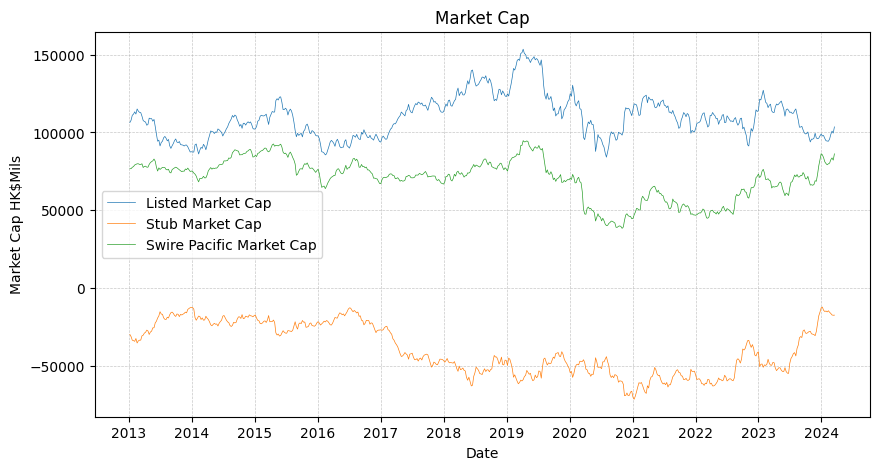

In [14]:
# plot the data
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(swire_weekly_mktcap_merge_fresh['date'], swire_weekly_mktcap_merge_fresh['listed_mktcap'], label='Listed Market Cap', linewidth=0.5)
plt.plot(swire_weekly_mktcap_merge_fresh['date'], swire_weekly_mktcap_merge_fresh['stub_mktcap'], label='Stub Market Cap', linewidth=0.5)
plt.plot(swire_weekly_mktcap_merge_fresh['date'], swire_weekly_mktcap_merge_fresh['swirepac_mktcap'], label='Swire Pacific Market Cap', linewidth=0.5)

plt.title('Market Cap')  # Set the title
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Market Cap HK$Mils')  # Set the y-axis label

# Adding a grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Improving the date ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add a legend
plt.legend()

plt.show()  # Show the plot